# The Generalised Hartree-Fock method: results

## Pre-requisites

## Import statements for calculation

In [1]:
import pyscf
from pyscf import *
from hf.HartreeFock import *
from hf.HartreeFock import lowest_HF as lowest
from hf.properties import spin as spin
from hf.utilities import SCF_functions as Scf
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
import math as m

## We use pySCF to create the molecules to work with

Our test systems are hydrogen rings. The geometry is created by making sure all the hydrogen atoms in a ring are 1 angstrom apart. This forces spin frustration in the uneven rings, and forces the even rings into a triplet state.

In [2]:
h3 = gto.M(atom = 'h 0 0 0; h 0 0.86602540378 0.5; h 0 0 1', spin = 1, basis = 'cc-pvdz')

h4 = gto.M(atom = 'h 0 0.707107 0; h 0.707107 0 0; h 0 -0.707107 0; h -0.707107 0 0' ,spin = 2, basis = 'cc-pvdz')

h5 = gto.M(atom = 'h 0 0.850651 0; h 0.8090171766429887 0.26286561528204344 0; h 0.5000001126478447, -0.6881911152820434, 0;'
                  ' h -0.5000001126478445, -0.6881911152820435, 0; h -0.8090171766429888 0.2628656152820433 0', spin = 1, basis = 'cc-pvdz')

h6 = gto.M(atom = 'h 0 0 0; h 0 2 0; h 0.866025 0.5 0; h -0.866025 0.5 0; h 0.866025 1.5 0; h -0.866025 1.5 0',
           basis = 'cc-pvdz')

h7 = gto.M(atom = 'h 0 1.15238 0; h 0.900966963766508 0.7184971778659673 0; h 1.12348742744009 -0.2564286738725775 0;'
                  'h 0.49999894328429173 -1.0382585039933896 0; h -0.4999989432842915 -1.0382585039933898 0;'
                  'h -1.12348742744009 -0.2564286738725768 0; h -0.9009669637665083 0.7184971778659671 0', spin = 1, basis = 'cc-pvdz')

h8 = gto.M(atom = 'h 0 1.30656 0; h 0.9238774360270954 0.9238774360270956 0; h 1.30656 0 0; h 0.9238774360270956 -0.9238774360270954 0;'
                  'h 0 -1.30656 0; h -0.9238774360270954 -0.9238774360270957 0; h -1.30656 0 0; h -0.9238774360270957 0.9238774360270954 0;',spin = 0, basis = 'cc-pvdz')

h9 = gto.M(atom = 'h 0 1.4619 0; h 0.9396912066007517 1.119880371395634 0; h 1.439690454128547 0.25385627093128554 0;'
                  'h 1.2660425377924711 -0.7309499999999997 0; h 0.49999924752779534 -1.3737366423269193 0; '
                  'h -0.499999247527795 -1.3737366423269195 0; h -1.2660425377924704 -0.7309500000000007 0; '
                  'h -1.4396904541285471 0.25385627093128493 0; h -0.9396912066007522 1.1198803713956338 0', spin = 1, basis = 'cc-pvdz')

h10 = gto.M(atom = 'h 0 1.61803 0; h 0.9510541717667903 1.3090137674084963 0; h 1.5388379750610472 0.49999876740849625 0;'
                   'h 1.5388379750610475 -0.4999987674084961 0; h 0.9510541717667905 -1.309013767408496 0; '
                   'h 0 -1.61803 0; h -0.9510541717667902 -1.3090137674084963 0; h -1.5388379750610472 -0.4999987674084964 0;'
                   'h -1.5388379750610475 0.4999987674084959 0; h -0.9510541717667905 1.309013767408496 0', basis = 'cc-pvdz')

h11 = gto.M(atom = 'h 0 1.77473 0; h 0.9594914779629726 1.4929978823214822 0; h 1.6143511911155242 0.7372494860248379 0;'
                   'h 1.7566658075493475 -0.2525704129287475 0; h 1.341251442093733 -1.1622009903547155 0; '
                   'h 0.49999922060319113 -1.7028409650628566 0; h -0.49999922060319074 -1.7028409650628569 0;'
                   'h -1.3412514420937325 -1.162200990354716 0; h -1.7566658075493475 -0.25257041292874755 0; '
                   'h -1.614351191115524 0.7372494860248385 0; h -0.9594914779629737 1.4929978823214813 0', spin = 1, basis = 'cc-pvdz')

h12 = gto.M(atom = 'h 0 1.93185 0; h 0.9659249999999999 1.673031176300968 0; h 1.6730311763009678 0.9659250000000003 0; '
                   'h 1.93185 0 0; h 1.6730311763009682 -0.9659249999999996 0; h 0.9659249999999999 -1.673031176300968 0; h 0 -1.93185 0;'
                   'h -0.9659250000000003 -1.6730311763009678 0; h -1.6730311763009673 -0.9659250000000009 0; h -1.93185 0 0;'
                   'h -1.6730311763009678  0.965925 0; h -0.9659250000000009 1.6730311763009673 0',spin = 0, basis = 'cc-pvdz')

h13 = gto.M(atom = 'h 0 2.08929 0; h 0.9709414761193252 1.849974419836995 0; h 1.7194519611729573 1.1868519946979366 0; '
                   'h 2.0740567235643232 0.25183608069064384 0; h 1.9535200856802104 -0.7408724444490994 0; '
                   'h 1.3854555386359115 -1.5638560210463994 0; h 0.49999982423935135 -2.0285790297300763 0; '
                   'h -0.4999998242393518 -2.0285790297300763 0; h -1.3854555386359113 -1.5638560210463999 0; '
                   'h -1.9535200856802102 -0.7408724444490998 0; h -2.0740567235643237 0.2518360806906424 0; '
                   'h -1.7194519611729568 1.1868519946979375 0; h -0.9709414761193248 1.8499744198369952 0', spin = 1, basis = 'cc-pvdz')

h14 = gto.M(atom = 'h 0 2.24698 0; h 0.9749280841223709 2.024459026799378 0; h 1.7567597044760135 1.4009691149805374 0; '
                   'h 2.1906435201143144 0.5000000881811595 0; h 2.1906435201143144 -0.5000000881811593 0; '
                   'h 1.7567597044760133 -1.4009691149805379 0; h 0.9749280841223711 -2.0244590267993776 0;'
                   'h 0 -2.24698 0; h -0.9749280841223705 -2.024459026799378 0; h -1.7567597044760135 -1.4009691149805377 0; '
                   'h -2.1906435201143144 -0.5000000881811578 0; h -2.190643520114314 0.5000000881811608 0; '
                   'h -1.756759704476014 1.4009691149805368 0; h -0.9749280841223712 2.0244590267993776 0',spin = 0, basis = 'cc-pvdz')

h15 = gto.M(atom = 'h 0 2.40487 0; h 0.9781487508336996 2.1969580647209614 0; h 1.787166696445821 1.6091721213142274 0; '
                   'h 2.2871672843427255 0.7431456992624799 0; h 2.391695870514299 -0.251377365458482 0; h 2.0826785127990832 -1.2024349999999995 0;'
                   'h 1.4135471196806 -1.9455806992624796 0; h 0.5000005878969047 -2.3523178205767072 0; '
                   'h -0.5000005878969053 -2.352317820576707 0; h -1.4135471196805995 -1.9455806992624798 0; '
                   'h -2.0826785127990823 -1.202435000000001 0; h -2.3916958705142997 -0.2513773654584815 0; '
                   'h -2.287167284342726 0.7431456992624793 0; h -1.7871666964458222 1.6091721213142263 0; '
                   'h -0.9781487508336995 2.196958064720962 0', spin = 1, basis = 'cc-pvdz')

# Unrestricted Hartree-Fock results

We will show the UHF results as a benchmark. UHF calculations are performed as follows:

Start off by creating the UHF objects.

In [3]:
h_3 = UHF.MF(h3, 3)
h_4 = UHF.MF(h4, 4)
h_5 = UHF.MF(h5, 5)
h_6 = UHF.MF(h6, 6)
h_7 = UHF.MF(h7, 7)
h_8 = UHF.MF(h8, 8)
h_9 = UHF.MF(h9, 9)
h_10 = UHF.MF(h10, 10)
h_11 = UHF.MF(h11, 11)
h_12 = UHF.MF(h12, 12)
h_13 = UHF.MF(h13, 13)
h_14 = UHF.MF(h14, 14)
h_15 = UHF.MF(h15, 15)

Then calculate the energies.

In [68]:
uhf_h3 = h_3.diis()
uhf_h4 = h_4.diis()
uhf_h5 = h_5.diis()
uhf_h6 = h_6.diis()
uhf_h7 = h_7.diis()
uhf_h8 = h_8.diis()
uhf_h9 = h_9.diis()
uhf_h10 = h_10.diis()
uhf_h11 = h_11.diis()
uhf_h12 = h_12.diis()
uhf_h13 = h_13.diis()
uhf_h14 = h_14.diis()
uhf_h15 = h_15.diis()

| Molecule | Hartree-Fock method | Energy (Hartree) | # iterations
| --- | --- | --- | --- |
| $H_3$ | UHF | {{uhf_h3[0]}} | {{uhf_h3[1]}} |
| $H_4$ | UHF | {{uhf_h4[0]}} | {{uhf_h4[1]}} |
| $H_5$ | UHF | {{uhf_h5[0]}} | {{uhf_h5[1]}} |
| $H_6$ | UHF | {{uhf_h6[0]}} | {{uhf_h6[1]}} |
| $H_7$ | UHF | {{uhf_h7[0]}} | {{uhf_h7[1]}} |
| $H_8$ | UHF | {{uhf_h8[0]}} | {{uhf_h8[1]}} |
| $H_9$ | UHF | {{uhf_h9[0]}} | {{uhf_h9[1]}} |
| $H_{10}$ | UHF | {{uhf_h10[0]}} | {{uhf_h10[1]}} |
| $H_{11}$ | UHF | {{uhf_h11[0]}} | {{uhf_h11[1]}} |
| $H_{12}$ | UHF | {{uhf_h12[0]}} | {{uhf_h12[1]}} |
| $H_{13}$ | UHF | {{uhf_h13[0]}} | {{uhf_h13[1]}} |
| $H_{14}$ | UHF | {{uhf_h14[0]}} | {{uhf_h14[1]}} |
| $H_{15}$ | UHF | {{uhf_h15[0]}} | {{uhf_h15[1]}} |

However, there's a catch. We can't be sure that these solutions are the lowest possible UHF solutions. To verify this, we'll apply stability analysis. Stability analysis calculates the Hessian matrix, and diagonalises it. If the eigenvalues are positive semi-definite, we have a so called stable solution. If there are strictly negative eigenvalues, It's possible to find a lower lying solution. Stability can be checked internally, within the current method (real UHF) or externally (UHF-> GHF or real-> complex). Both stabilities are checked here. This should be able to tell us which systems have a GHF solution as well. The internal stability analysis also returns a set of coefficients that are rotated in the direction of the lowest eigenvector of the Hessian. These new MO coefficients can then be used to "follow" the stability analysis to the lower lying energy state.

In [5]:
print("Checking H_3 stability")
print("----------------------")
new_mo_3 = h_3.stability_analysis('internal')
h_3.stability_analysis('external')
print('')
print("Checking H_4 stability")
print("----------------------")
new_mo_4 = h_4.stability_analysis('internal')
h_4.stability_analysis('external')
print('')
print("Checking H_5 stability")
print("----------------------")
new_mo_5 = h_5.stability_analysis('internal')
h_5.stability_analysis('external')
print('')
print("Checking H_6 stability")
print("----------------------")
new_mo_6 = h_6.stability_analysis('internal')
h_6.stability_analysis('external')
print('')
print("Checking H_7 stability")
print("----------------------")
#new_mo_7 = h_7.stability_analysis('internal')
h_7.stability_analysis('external')
print('')
print("Checking H_8 stability")
print("----------------------")
new_mo_8 = h_8.stability_analysis('internal')
h_8.stability_analysis('external')
print('')
print("Checking H_9 stability")
print("----------------------")
new_mo_9 = h_9.stability_analysis('internal')
h_9.stability_analysis('external')
print('')
print("Checking H_10 stability")
print("----------------------")
new_mo_10 = h_10.stability_analysis('internal')
h_10.stability_analysis('external')
print('')
print("Checking H_11 stability")
print("----------------------")
new_mo_11 = h_11.stability_analysis('internal')
h_11.stability_analysis('external')
print('')
print("Checking H_12 stability")
print("----------------------")
new_mo_12 = h_12.stability_analysis('internal')
h_12.stability_analysis('external')
print('')
print("Checking H_13 stability")
print("----------------------")
new_mo_13 = h_13.stability_analysis('internal')
h_13.stability_analysis('external')
print('')
print("Checking H_14 stability")
print("----------------------")
new_mo_14 = h_14.stability_analysis('internal')
h_14.stability_analysis('external')
print('')
print("Checking H_15 stability")
print("----------------------")
new_mo_15 = h_15.stability_analysis('internal')
h_15.stability_analysis('external')

Checking H_3 stability
----------------------
The wave function is stable within the real UHF space.
There is an external UHF/GHF instability in the real UHF wave function.

Checking H_4 stability
----------------------
There is an internal instability in the real UHF wave function.
There is an external real/complex instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.

Checking H_5 stability
----------------------
The wave function is stable within the real UHF space.
There is an external UHF/GHF instability in the real UHF wave function.

Checking H_6 stability
----------------------
The wave function is stable within the real UHF space.
The wave function is stable within the real/complex & UHF/GHF space.

Checking H_7 stability
----------------------
There is an external UHF/GHF instability in the real UHF wave function.

Checking H_8 stability
----------------------
There is an internal instability in the real UHF wave fu

We see that the uneven systems are stable within the real UHF method, but have an external instability towards GHF. This means that they should have a lower lying GHF energy state. The even rings (other than $H_6$ and $H_{10}$) however, show an internal instability. We'll now follow the lowest eigenvector, which should lead us towards a lower lying energy state.

In [6]:
uhf_h4 = h_4.scf(new_mo_4)
uhf_h8 = h_8.scf(new_mo_8)
uhf_h12 = h_12.scf(new_mo_12)
uhf_h14 = h_14.scf(new_mo_14)

We should also check whether or not the new solutions are stable.

In [7]:
print("Checking H_4 stability")
print("----------------------")
h_4.stability_analysis('internal')
h_4.stability_analysis('external')
print('')
print("Checking H_8 stability")
print("----------------------")
h_8.stability_analysis('internal')
h_8.stability_analysis('external')
print('')
print("Checking H_12 stability")
print("----------------------")
h_12.stability_analysis('internal')
h_12.stability_analysis('external')
print('')
print("Checking H_14 stability")
print("----------------------")
h_14.stability_analysis('internal')
h_14.stability_analysis('external')

Checking H_4 stability
----------------------
The wave function is stable within the real UHF space.
The wave function is stable within the real/complex & UHF/GHF space.

Checking H_8 stability
----------------------
The wave function is stable within the real UHF space.
The wave function is stable within the real/complex & UHF/GHF space.

Checking H_12 stability
----------------------
The wave function is stable within the real UHF space.
The wave function is stable within the real/complex & UHF/GHF space.

Checking H_14 stability
----------------------
The wave function is stable within the real UHF space.
The wave function is stable within the real/complex & UHF/GHF space.


| Molecule | Hartree-Fock method | Energy (Hartree) | # iterations
| --- | --- | --- | --- |
| $H_3$ | UHF | {{uhf_h3[0]}} | {{uhf_h3[1]}} |
| $H_4$ | UHF | {{uhf_h4[0]}} | {{uhf_h4[1]}} |
| $H_5$ | UHF | {{uhf_h5[0]}} | {{uhf_h5[1]}} |
| $H_6$ | UHF | {{uhf_h6[0]}} | {{uhf_h6[1]}} |
| $H_7$ | UHF | {{uhf_h7[0]}} | {{uhf_h7[1]}} |
| $H_8$ | UHF | {{uhf_h8[0]}} | {{uhf_h8[1]}} |
| $H_9$ | UHF | {{uhf_h9[0]}} | {{uhf_h9[1]}} |
| $H_{10}$ | UHF | {{uhf_h10[0]}} | {{uhf_h10[1]}} |
| $H_{11}$ | UHF | {{uhf_h11[0]}} | {{uhf_h11[1]}} |
| $H_{12}$ | UHF | {{uhf_h12[0]}} | {{uhf_h12[1]}} |
| $H_{13}$ | UHF | {{uhf_h13[0]}} | {{uhf_h13[1]}} |
| $H_{14}$ | UHF | {{uhf_h14[0]}} | {{uhf_h14[1]}} |
| $H_{15}$ | UHF | {{uhf_h15[0]}} | {{uhf_h15[1]}} |

# Generalised Hartree-Fock results

Next up, is to check the GHF solutions. We'lll work the same way as we did for UHF, by checking the stability of the solutions and following it when necessary.

First create the objects in the GHF class.

In [8]:
h_3_g = GHF.MF(h3, 3)
h_4_g = GHF.MF(h4, 4)
h_5_g = GHF.MF(h5, 5)
h_6_g = GHF.MF(h6, 6)
h_7_g = GHF.MF(h7, 7)
h_8_g = GHF.MF(h8, 8)
h_9_g = GHF.MF(h9, 9)
h_10_g = GHF.MF(h10, 10)
h_11_g = GHF.MF(h11, 11)
h_12_g = GHF.MF(h12, 12)
h_13_g = GHF.MF(h13, 13)
h_14_g = GHF.MF(h14, 14)
h_15_g = GHF.MF(h15, 15)

Then calculate the energies. We don't use DIIS, since this sometimes leads to another converged solution and provides difficulties when trying to rotate away from this solution.

In [67]:
ghf_h3 = h_3_g.diis()
ghf_h4 = h_4_g.diis()
ghf_h5 = h_5_g.diis()
ghf_h6 = h_6_g.diis()
ghf_h7 = h_7_g.diis()
ghf_h8 = h_8_g.diis()
ghf_h9 = h_9_g.diis()
ghf_h10 = h_10_g.diis()
ghf_h11 = h_11_g.diis()
ghf_h12 = h_12_g.diis()
ghf_h13 = h_13_g.diis()
ghf_h14 = h_14_g.diis()
ghf_h15 = h_15_g.diis()

| Molecule | Hartree-Fock method | Energy (Hartree) | # iterations
| --- | --- | --- | --- |
| $H_3$ | GHF | {{ghf_h3[0]}} | {{ghf_h3[1]}} |
| $H_4$ | GHF | {{ghf_h4[0]}} | {{ghf_h4[1]}} |
| $H_5$ | GHF | {{ghf_h5[0]}} | {{ghf_h5[1]}} |
| $H_6$ | GHF | {{ghf_h6[0]}} | {{ghf_h6[1]}} |
| $H_7$ | GHF | {{ghf_h7[0]}} | {{ghf_h7[1]}} |
| $H_8$ | GHF | {{ghf_h8[0]}} | {{ghf_h8[1]}} |
| $H_9$ | GHF | {{ghf_h9[0]}} | {{ghf_h9[1]}} |
| $H_{10}$ | GHF | {{ghf_h10[0]}} | {{ghf_h10[1]}} |
| $H_{11}$ | GHF | {{ghf_h11[0]}} | {{ghf_h11[1]}} |
| $H_{12}$ | GHF | {{ghf_h12[0]}} | {{ghf_h12[1]}} |
| $H_{13}$ | GHF | {{ghf_h13[0]}} | {{ghf_h13[1]}} |
| $H_{14}$ | GHF | {{ghf_h14[0]}} | {{ghf_h14[1]}} |
| $H_{15}$ | GHF | {{ghf_h15[0]}} | {{ghf_h15[1]}} |

Let's look at the stability analyses, in order to know where we can go lower in energy.

In [10]:
print("Checking H_3 stability")
print("----------------------")
rot_mo_3 = h_3_g.stability_analysis('internal')
h_3_g.stability_analysis('external')
print(" ")

print("Checking H_4 stability")
print("----------------------")
rot_mo_4 = h_4_g.stability_analysis('internal')
h_4_g.stability_analysis('external')
print(" ")

print("Checking H_5 stability")
print("----------------------")
rot_mo_5 = h_5_g.stability_analysis('internal')
h_5_g.stability_analysis('external')
print(" ")

print("Checking H_6 stability")
print("----------------------")
rot_mo_6 = h_6_g.stability_analysis('internal')
h_6_g.stability_analysis('external')
print(" ")

print("Checking H_7 stability")
print("----------------------")
rot_mo_7 = h_7_g.stability_analysis('internal')
h_7_g.stability_analysis('external')
print(" ")

print("Checking H_8 stability")
print("----------------------")
rot_mo_8 = h_8_g.stability_analysis('internal')
h_8_g.stability_analysis('external')
print(" ")

print("Checking H_9 stability")
print("----------------------")
rot_mo_9 = h_9_g.stability_analysis('internal')
h_9_g.stability_analysis('external')
print(" ")

print("Checking H_10 stability")
print("-----------------------")
rot_mo_10 = h_10_g.stability_analysis('internal')
h_10_g.stability_analysis('external')
print(" ")

print("Checking H_11 stability")
print("-----------------------")
rot_mo_11 = h_11_g.stability_analysis('internal')
h_11_g.stability_analysis('external')
print(" ")

print("Checking H_12 stability")
print("-----------------------")
rot_mo_12 = h_12_g.stability_analysis('internal')
h_12_g.stability_analysis('external')
print(" ")

print("Checking H_13 stability")
print("-----------------------")
rot_mo_13 = h_13_g.stability_analysis('internal')
h_13_g.stability_analysis('external')
print(" ")

print("Checking H_14 stability")
print("-----------------------")
rot_mo_14 = h_14_g.stability_analysis('internal')
h_14_g.stability_analysis('external')
print(" ")

print("Checking H_15 stability")
print("-----------------------")
rot_mo_15 = h_15_g.stability_analysis('internal')
h_15_g.stability_analysis('external')

Checking H_3 stability
----------------------
There is an internal instability in the real GHF wave function.
There is an external real/complex instability in the real GHF wave function.
 
Checking H_4 stability
----------------------
There is an internal instability in the real GHF wave function.
There is an external real/complex instability in the real GHF wave function.
 
Checking H_5 stability
----------------------
There is an internal instability in the real GHF wave function.
There is an external real/complex instability in the real GHF wave function.
 
Checking H_6 stability
----------------------
The wave function is stable within the real GHF space.
The wave function is stable within the real/complex space.
 
Checking H_7 stability
----------------------
There is an internal instability in the real GHF wave function.
There is an external real/complex instability in the real GHF wave function.
 
Checking H_8 stability
----------------------
There is an internal instability in 

The first thing we follow is always the internal stability analysis, until an internally stable solution is found. After that, The external stability analysis must be checked and followed. $H_6$ and $H_{10}$ are fully stable solutions already. We will follow the rest.

In [11]:
ghf_h3 = h_3_g.scf(rot_mo_3)
ghf_h4 = h_4_g.scf(rot_mo_4)
ghf_h5 = h_5_g.scf(rot_mo_5)
ghf_h7 = h_7_g.scf(rot_mo_7)
ghf_h8 = h_8_g.scf(rot_mo_8)
ghf_h9 = h_9_g.scf(rot_mo_9)
ghf_h11 = h_11_g.scf(rot_mo_11)
ghf_h12 = h_12_g.scf(rot_mo_12)
ghf_h13 = h_13_g.scf(rot_mo_13)
ghf_h14 = h_14_g.scf(rot_mo_14)
ghf_h15 = h_15_g.scf(rot_mo_15)

| Molecule | Hartree-Fock method | Energy (Hartree) | # iterations
| --- | --- | --- | --- |
| $H_3$ | GHF | {{ghf_h3[0]}} | {{ghf_h3[1]}} |
| $H_4$ | GHF | {{ghf_h4[0]}} | {{ghf_h4[1]}} |
| $H_5$ | GHF | {{ghf_h5[0]}} | {{ghf_h5[1]}} |
| $H_6$ | GHF | {{ghf_h6[0]}} | {{ghf_h6[1]}} |
| $H_7$ | GHF | {{ghf_h7[0]}} | {{ghf_h7[1]}} |
| $H_8$ | GHF | {{ghf_h8[0]}} | {{ghf_h8[1]}} |
| $H_9$ | GHF | {{ghf_h9[0]}} | {{ghf_h9[1]}} |
| $H_{10}$ | GHF | {{ghf_h10[0]}} | {{ghf_h10[1]}} |
| $H_{11}$ | GHF | {{ghf_h11[0]}} | {{ghf_h11[1]}} |
| $H_{12}$ | GHF | {{ghf_h12[0]}} | {{ghf_h12[1]}} |
| $H_{13}$ | GHF | {{ghf_h13[0]}} | {{ghf_h13[1]}} |
| $H_{14}$ | GHF | {{ghf_h14[0]}} | {{ghf_h14[1]}} |
| $H_{15}$ | GHF | {{ghf_h15[0]}} | {{ghf_h15[1]}} |

Now, the stability of the new solutions should be checked.

In [12]:
print("Checking H_3 stability")
print("----------------------")
rot_mo_3 = h_3_g.stability_analysis('internal')
h_3_g.stability_analysis('external')
print(" ")

print("Checking H_4 stability")
print("----------------------")
rot_mo_4 = h_4_g.stability_analysis('internal')
h_4_g.stability_analysis('external')
print(" ")

print("Checking H_5 stability")
print("----------------------")
rot_mo_5 = h_5_g.stability_analysis('internal')
h_5_g.stability_analysis('external')
print(" ")

print("Checking H_6 stability")
print("----------------------")
rot_mo_6 = h_6_g.stability_analysis('internal')
h_6_g.stability_analysis('external')
print(" ")

print("Checking H_7 stability")
print("----------------------")
rot_mo_7 = h_7_g.stability_analysis('internal')
h_7_g.stability_analysis('external')
print(" ")

print("Checking H_8 stability")
print("----------------------")
rot_mo_8 = h_8_g.stability_analysis('internal')
h_8_g.stability_analysis('external')
print(" ")

print("Checking H_9 stability")
print("----------------------")
rot_mo_9 = h_9_g.stability_analysis('internal')
h_9_g.stability_analysis('external')
print(" ")

print("Checking H_10 stability")
print("-----------------------")
rot_mo_10 = h_10_g.stability_analysis('internal')
h_10_g.stability_analysis('external')
print(" ")

print("Checking H_11 stability")
print("-----------------------")
rot_mo_11 = h_11_g.stability_analysis('internal')
h_11_g.stability_analysis('external')
print(" ")

print("Checking H_12 stability")
print("-----------------------")
rot_mo_12 = h_12_g.stability_analysis('internal')
h_12_g.stability_analysis('external')
print(" ")

print("Checking H_13 stability")
print("-----------------------")
rot_mo_13 = h_13_g.stability_analysis('internal')
h_13_g.stability_analysis('external')
print(" ")

print("Checking H_14 stability")
print("-----------------------")
rot_mo_14 = h_14_g.stability_analysis('internal')
h_14_g.stability_analysis('external')
print(" ")

print("Checking H_15 stability")
print("-----------------------")
rot_mo_15 = h_15_g.stability_analysis('internal')
h_15_g.stability_analysis('external')

Checking H_3 stability
----------------------
The wave function is stable within the real GHF space.
The wave function is stable within the real/complex space.
 
Checking H_4 stability
----------------------
The wave function is stable within the real GHF space.
The wave function is stable within the real/complex space.
 
Checking H_5 stability
----------------------
The wave function is stable within the real GHF space.
The wave function is stable within the real/complex space.
 
Checking H_6 stability
----------------------
The wave function is stable within the real GHF space.
The wave function is stable within the real/complex space.
 
Checking H_7 stability
----------------------
The wave function is stable within the real GHF space.
The wave function is stable within the real/complex space.
 
Checking H_8 stability
----------------------
The wave function is stable within the real GHF space.
The wave function is stable within the real/complex space.
 
Checking H_9 stability
-----

## Compare UHF and GHF

In [13]:
h = gto.M(atom = 'h 0 0 0', spin = 1, basis = 'cc-pvdz')
ref = GHF.MF(h, 1).scf()[0]

We compare each UHF energy to the energy of an equal amount of hydrogens at infinite distance.

In [14]:
u3 = np.around(((uhf_h3[0] - 3 * ref) * 627.5), 2)
u4 = np.around(((uhf_h4[0] - 4 * ref) * 627.5), 2)
u5 = np.around(((uhf_h5[0] - 5 * ref) * 627.5), 2)
u6 = np.around(((uhf_h6[0] - 6 * ref) * 627.5), 2)
u7 = np.around(((uhf_h7[0] - 7 * ref) * 627.5), 2)
u8 = np.around(((uhf_h8[0] - 8 * ref) * 627.5), 2)
u9 = np.around(((uhf_h9[0] - 9 * ref) * 627.5), 2)
u10 = np.around(((uhf_h10[0] - 10 * ref) * 627.5), 2)
u11 = np.around(((uhf_h11[0] - 11 * ref) * 627.5), 2)
u12 = np.around(((uhf_h12[0] - 12 * ref) * 627.5), 2)
u13 = np.around(((uhf_h13[0] - 13 * ref) * 627.5), 2)
u14 = np.around(((uhf_h14[0] - 14 * ref) * 627.5), 2)
u15 = np.around(((uhf_h15[0] - 15 * ref) * 627.5), 2)

We do the same for the GHF results.

In [15]:
g3 = np.around(((ghf_h3[0] - 3 * ref) * 627.5), 2)
g4 = np.around(((ghf_h4[0] - 4 * ref) * 627.5), 2)
g5 = np.around(((ghf_h5[0] - 5 * ref) * 627.5), 2)
g6 = np.around(((ghf_h6[0] - 6 * ref) * 627.5), 2)
g7 = np.around(((ghf_h7[0] - 7 * ref) * 627.5), 2)
g8 = np.around(((ghf_h8[0] - 8 * ref) * 627.5), 2)
g9 = np.around(((ghf_h9[0] - 9 * ref) * 627.5), 2)
g10 = np.around(((ghf_h10[0] - 10 * ref) * 627.5), 2)
g11 = np.around(((ghf_h11[0] - 11 * ref) * 627.5), 2)
g12 = np.around(((ghf_h12[0] - 12 * ref) * 627.5), 2)
g13 = np.around(((ghf_h13[0] - 13 * ref) * 627.5), 2)
g14 = np.around(((ghf_h14[0] - 14 * ref) * 627.5), 2)
g15 = np.around(((ghf_h15[0] - 15 * ref) * 627.5), 2)

In [16]:
d3 = np.around(g3-u3, 2)
d4 = np.around(g4-u4, 2)
d5 = np.around(g5-u5, 2)
d6 = np.around(g6-u6, 2)
d7 = np.around(g7-u7, 2)
d8 = np.around(g8-u8, 2)
d9 = np.around(g9-u9, 2)
d10 = np.around(g10-u10, 2)
d11 = np.around(g11-u11, 2)
d12 = np.around(g12-u12, 2)
d13 = np.around(g13-u13, 2)
d14 = np.around(g14-u14, 2)
d15 = np.around(g15-u15, 2)

| Molecule | $\Delta$ UHF ($\frac{kcal}{mol}$) | $\Delta$ GHF ($\frac{kcal}{mol}$) | $\Delta$(GHF - UHF)($\frac{kcal}{mol}$)
| --- | --- | --- | --- |
| $H_3$ | {{u3}} | {{g3}} | {{d3}} |
| $H_4$ | {{u4}} | {{g4}} | {{d4}} |
| $H_5$ | {{u5}} | {{g5}} | {{d5}} |
| $H_6$ | {{u6}} | {{g6}} | {{d6}} |
| $H_7$ | {{u7}} | {{g7}} | {{d7}} |
| $H_8$ | {{u8}} | {{g8}} | {{d8}} |
| $H_9$ | {{u9}} | {{g9}} | {{d9}} |
| $H_{10}$ | {{u10}} | {{g10}} | {{d10}} |
| $H_{11}$ | {{u11}} | {{g11}} | {{d11}} |
| $H_{12}$ | {{u12}} | {{g12}} | {{d12}} |
| $H_{13}$ | {{u13}} | {{g13}} | {{d13}} |
| $H_{14}$ | {{u14}} | {{g14}} | {{d14}} |
| $H_{15}$ | {{u15}} | {{g15}} | {{d15}} |

## Conclusions

We can see that when following stability analysis, real GHF is enough to find the lowest lying energies and there is no need to resort to complex methods. We'll come back to this later.

# Spin expectation values

## Unrestricted Hartree-Fock

An unrestricted Hartree-Fock wavefunction no longer is an eigenfunction of $S^2$. This means that spin contamination will show in the $S^2$ expectation value. It is however still an eigenfunction of $S_z$, which means that the expectation value for this operator will either be 0 or 0.5.

In [17]:
mo_3 = h_3.get_mo_coeff()
s_values_h3 = np.around(spin.uhf(h_3.n_a, h_3.n_b, mo_3[0], mo_3[1], h_3.get_ovlp()), 5)

mo_4 = h_4.get_mo_coeff()
s_values_h4 = np.around(spin.uhf(h_4.n_a, h_4.n_b, mo_4[0], mo_4[1], h_4.get_ovlp()), 5)

mo_5 = h_5.get_mo_coeff()
s_values_h5 = np.around(spin.uhf(h_5.n_a, h_5.n_b, mo_5[0], mo_5[1], h_5.get_ovlp()), 5)

mo_6 = h_6.get_mo_coeff()
s_values_h6 = np.around(spin.uhf(h_6.n_a, h_6.n_b, mo_6[0], mo_6[1], h_6.get_ovlp()), 5)

mo_7 = h_7.get_mo_coeff()
s_values_h7 = np.around(spin.uhf(h_7.n_a, h_7.n_b, mo_7[0], mo_7[1], h_7.get_ovlp()), 5)

mo_8 = h_8.get_mo_coeff()
s_values_h8 = np.around(spin.uhf(h_8.n_a, h_8.n_b, mo_8[0], mo_8[1], h_8.get_ovlp()), 5)

mo_9 = h_9.get_mo_coeff()
s_values_h9 = np.around(spin.uhf(h_9.n_a, h_9.n_b, mo_9[0], mo_9[1], h_9.get_ovlp()), 5)

mo_10 = h_10.get_mo_coeff()
s_values_h10 = np.around(spin.uhf(h_10.n_a, h_10.n_b, mo_10[0], mo_10[1], h_10.get_ovlp()), 5)

mo_11 = h_11.get_mo_coeff()
s_values_h11 = np.around(spin.uhf(h_11.n_a, h_11.n_b, mo_11[0], mo_11[1], h_11.get_ovlp()), 5)

mo_12 = h_12.get_mo_coeff()
s_values_h12 = np.around(spin.uhf(h_12.n_a, h_12.n_b, mo_12[0], mo_12[1], h_12.get_ovlp()), 5)

mo_13 = h_13.get_mo_coeff()
s_values_h13 = np.around(spin.uhf(h_13.n_a, h_13.n_b, mo_13[0], mo_13[1], h_13.get_ovlp()),5 )

mo_14 = h_14.get_mo_coeff()
s_values_h14 = np.around(spin.uhf(h_14.n_a, h_14.n_b, mo_14[0], mo_14[1], h_14.get_ovlp()), 5)

mo_15 = h_15.get_mo_coeff()
s_values_h15 = np.around(spin.uhf(h_15.n_a, h_15.n_b, mo_15[0], mo_15[1], h_15.get_ovlp()), 5)

| Molecule | <$\hat{S^2}$> | <$\hat{S_z}$> | Multiplicity (2S+1)
| --- | --- | --- | --- |
| $H_3$ | {{s_values_h3[0]}} | {{s_values_h3[1]}} | {{s_values_h3[2]}} |
| $H_4$ | {{s_values_h4[0]}} | {{s_values_h4[1]}} | {{s_values_h4[2]}} |
| $H_5$ | {{s_values_h5[0]}} | {{s_values_h5[1]}} | {{s_values_h5[2]}} |
| $H_6$ | {{s_values_h6[0]}} | {{s_values_h6[1]}} | {{s_values_h6[2]}} |
| $H_7$ | {{s_values_h7[0]}} | {{s_values_h7[1]}} | {{s_values_h7[2]}} |
| $H_8$ | {{s_values_h8[0]}} | {{s_values_h8[1]}} | {{s_values_h8[2]}} |
| $H_9$ | {{s_values_h9[0]}} | {{s_values_h9[1]}} | {{s_values_h9[2]}} |
| $H_{10}$ | {{s_values_h10[0]}} | {{s_values_h10[1]}} | {{s_values_h10[2]}} |
| $H_{11}$ | {{s_values_h11[0]}} | {{s_values_h11[1]}} | {{s_values_h11[2]}} |
| $H_{12}$ | {{s_values_h12[0]}} | {{s_values_h12[1]}} | {{s_values_h12[2]}} |
| $H_{13}$ | {{s_values_h13[0]}} | {{s_values_h13[1]}} | {{s_values_h13[2]}} |
| $H_{14}$ | {{s_values_h14[0]}} | {{s_values_h14[1]}} | {{s_values_h14[2]}} |
| $H_{15}$ | {{s_values_h15[0]}} | {{s_values_h15[1]}} | {{s_values_h15[2]}} |

To visualize this, let's plot the expectation values.

In [18]:
s_2 = [s_values_h3[0], s_values_h4[0], s_values_h5[0], s_values_h6[0], s_values_h7[0], s_values_h8[0], s_values_h9[0], s_values_h10[0], s_values_h11[0], s_values_h12[0], s_values_h13[0], s_values_h14[0], s_values_h15[0]]
s_z = [s_values_h3[1], s_values_h4[1], s_values_h5[1], s_values_h6[1], s_values_h7[1], s_values_h8[1], s_values_h9[1], s_values_h10[1], s_values_h11[1], s_values_h12[1], s_values_h13[1], s_values_h14[1], s_values_h15[1]]
x_axis = np.arange(3, 16)

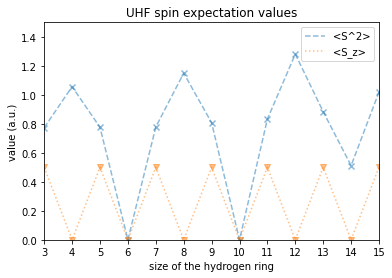

In [19]:
plt.plot(x_axis, s_2, label='<S^2>', linestyle='--', alpha=0.5)
plt.plot(x_axis, s_z, label='<S_z>', linestyle=':', alpha=0.5)
plt.scatter(x_axis, s_2, marker='x', alpha=0.5)
plt.scatter(x_axis, s_z, marker='v', alpha=0.5)
plt.axis([3, 15, 0, 1.5])
plt.xticks(x_axis)
plt.xlabel('size of the hydrogen ring')
plt.ylabel('value (a.u.)')
plt.title('UHF spin expectation values')
plt.legend()
plt.show()

## Generalised Hartree-Fock

A generalised Hartree-Fock wave function also breaks $S_z$ symmetry. This will show in the expectation values. All $S_z$ values will drop to zero, since the spins will be positioned in a way that they even each other out.

In [20]:
mo_3_g = h_3_g.get_mo_coeff()
s_values_h3_g = np.around(spin.ghf(mo_3_g, h_3_g.number_of_electrons, Scf.trans_matrix(h_3_g.get_ovlp())), 5)

mo_4_g = h_4_g.get_mo_coeff()
s_values_h4_g = np.around(spin.ghf(mo_4_g, h_4_g.number_of_electrons, Scf.trans_matrix(h_4_g.get_ovlp())), 5)

mo_5_g = h_5_g.get_mo_coeff()
s_values_h5_g = np.around(spin.ghf(mo_5_g, h_5_g.number_of_electrons, Scf.trans_matrix(h_5_g.get_ovlp())), 5)

mo_6_g = h_6_g.get_mo_coeff()
s_values_h6_g = np.around(spin.ghf(mo_6_g, h_6_g.number_of_electrons, Scf.trans_matrix(h_6_g.get_ovlp())), 5)

mo_7_g = h_7_g.get_mo_coeff()
s_values_h7_g = np.around(spin.ghf(mo_7_g, h_7_g.number_of_electrons, Scf.trans_matrix(h_7_g.get_ovlp())), 5)

mo_8_g = h_8_g.get_mo_coeff()
s_values_h8_g = np.around(spin.ghf(mo_8_g, h_8_g.number_of_electrons, Scf.trans_matrix(h_8_g.get_ovlp())), 5)

mo_9_g = h_9_g.get_mo_coeff()
s_values_h9_g = np.around(spin.ghf(mo_9_g, h_9_g.number_of_electrons, Scf.trans_matrix(h_9_g.get_ovlp())), 5)

mo_10_g = h_10_g.get_mo_coeff()
s_values_h10_g = np.around(spin.ghf(mo_10_g, h_10_g.number_of_electrons, Scf.trans_matrix(h_10_g.get_ovlp())), 5)

mo_11_g = h_11_g.get_mo_coeff()
s_values_h11_g = np.around(spin.ghf(mo_11_g, h_11_g.number_of_electrons, Scf.trans_matrix(h_11_g.get_ovlp())), 5)

mo_12_g = h_12_g.get_mo_coeff()
s_values_h12_g = np.around(spin.ghf(mo_12_g, h_12_g.number_of_electrons, Scf.trans_matrix(h_12_g.get_ovlp())), 5)

mo_13_g = h_13_g.get_mo_coeff()
s_values_h13_g = np.around(spin.ghf(mo_13_g, h_13_g.number_of_electrons, Scf.trans_matrix(h_13_g.get_ovlp())), 5)

mo_14_g = h_14_g.get_mo_coeff()
s_values_h14_g = np.around(spin.ghf(mo_14_g, h_14_g.number_of_electrons, Scf.trans_matrix(h_14_g.get_ovlp())), 5)

mo_15_g = h_15_g.get_mo_coeff()
s_values_h15_g = np.around(spin.ghf(mo_15_g, h_15_g.number_of_electrons, Scf.trans_matrix(h_15_g.get_ovlp())), 5)

| Molecule | <$\hat{S^2}$> | <$\hat{S_z}$> | Multiplicity (2S+1)
| --- | --- | --- | --- |
| $H_3$ | {{s_values_h3_g[1]}} | {{s_values_h3_g[0]}} | {{s_values_h3_g[2]}} |
| $H_4$ | {{s_values_h4_g[1]}} | {{s_values_h4_g[0]}} | {{s_values_h4_g[2]}} |
| $H_5$ | {{s_values_h5_g[1]}} | {{s_values_h5_g[0]}} | {{s_values_h5_g[2]}} |
| $H_6$ | {{s_values_h6_g[1]}} | {{s_values_h6_g[0]}} | {{s_values_h6_g[2]}} |
| $H_7$ | {{s_values_h7_g[1]}} | {{s_values_h7_g[0]}} | {{s_values_h7_g[2]}} |
| $H_8$ | {{s_values_h8_g[1]}} | {{s_values_h8_g[0]}} | {{s_values_h8_g[2]}} |
| $H_9$ | {{s_values_h9_g[1]}} | {{s_values_h9_g[0]}} | {{s_values_h9_g[2]}} |
| $H_{10}$ | {{s_values_h10_g[1]}} | {{s_values_h10_g[0]}} | {{s_values_h10_g[2]}} |
| $H_{11}$ | {{s_values_h11_g[1]}} | {{s_values_h11_g[0]}} | {{s_values_h11_g[2]}} |
| $H_{12}$ | {{s_values_h12_g[1]}} | {{s_values_h12_g[0]}} | {{s_values_h12_g[2]}} |
| $H_{13}$ | {{s_values_h13_g[1]}} | {{s_values_h13_g[0]}} | {{s_values_h13_g[2]}} |
| $H_{14}$ | {{s_values_h14_g[1]}} | {{s_values_h14_g[0]}} | {{s_values_h14_g[2]}} |
| $H_{15}$ | {{s_values_h15_g[1]}} | {{s_values_h15_g[0]}} | {{s_values_h15_g[2]}} |

Let's visualise these results as well.

In [21]:
s_z_g = [s_values_h3_g[0], s_values_h4_g[0], s_values_h5_g[0], s_values_h6_g[0], s_values_h7_g[0], s_values_h8_g[0], s_values_h9_g[0], s_values_h10_g[0], s_values_h11_g[0], s_values_h12_g[0], s_values_h13_g[0], s_values_h14_g[0], s_values_h15_g[0]]
s_2_g = [s_values_h3_g[1], s_values_h4_g[1], s_values_h5_g[1], s_values_h6_g[1], s_values_h7_g[1], s_values_h8_g[1], s_values_h9_g[1], s_values_h10_g[1], s_values_h11_g[1], s_values_h12_g[1], s_values_h13_g[1], s_values_h14_g[1], s_values_h15_g[1]]
x_axis = np.arange(3, 16)

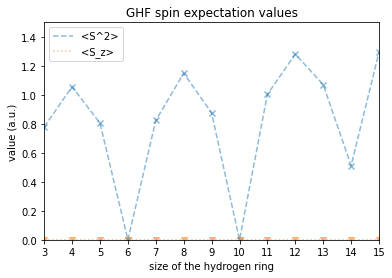

In [22]:
plt.plot(x_axis, s_2_g, label='<S^2>', linestyle='--', alpha=0.5)
plt.plot(x_axis, s_z_g, label='<S_z>', linestyle=':', alpha=0.5)
plt.scatter(x_axis, s_2_g, marker='x', alpha=0.5)
plt.scatter(x_axis, s_z_g, marker='v', alpha=0.5)
plt.axis([3, 15, 0, 1.5])
plt.xticks(x_axis)
plt.xlabel('size of the hydrogen ring')
plt.ylabel('value (a.u.)')
plt.title('GHF spin expectation values')
plt.legend()
plt.show()

## Energy vs. spin

Let's see if we can find a connection between the amount of energy gained by using GHF and the increase in spin multiplicity.

In [23]:
dm3 = s_values_h3_g[2] - s_values_h3[2]
dm4 = s_values_h4_g[2] - s_values_h4[2]
dm5 = s_values_h5_g[2] - s_values_h5[2]
dm6 = s_values_h6_g[2] - s_values_h6[2]
dm7 = s_values_h7_g[2] - s_values_h7[2]
dm8 = s_values_h8_g[2] - s_values_h8[2]
dm9 = s_values_h9_g[2] - s_values_h9[2]
dm10 = s_values_h10_g[2] - s_values_h10[2]
dm11 = s_values_h11_g[2] - s_values_h11[2]
dm12 = s_values_h12_g[2] - s_values_h12[2]
dm13 = s_values_h13_g[2] - s_values_h13[2]
dm14 = s_values_h14_g[2] - s_values_h14[2]
dm15 = s_values_h15_g[2] - s_values_h15[2]

In [24]:
delta_mult = [dm3, dm5, dm7, dm9, dm11, dm13, dm15]
delta_e = [d3, d5, d7, d9, d11, d13, d15]

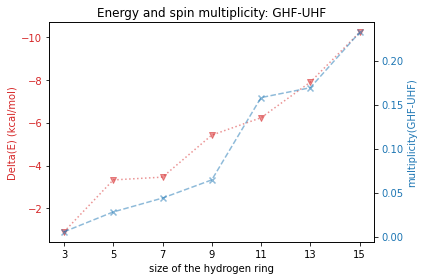

In [25]:
x_axis = [3, 5, 7, 9, 11, 13, 15]
fig, ax1 = plt.subplots()
color = 'tab:red'
plt.xticks(x_axis)
ax1.set_xlabel('size of the hydrogen ring')
ax1.set_ylabel('Delta(E) (kcal/mol)', color=color)
ax1.plot(x_axis, delta_e, label='Energy(GHF-UHF)', linestyle=':', alpha=0.5, color=color)
ax1.scatter(x_axis, delta_e, marker='v', alpha=0.5, color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.gca().invert_yaxis()

ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.plot(x_axis, delta_mult, label='multiplicity(GHF-UHF)', linestyle='--', alpha=0.5, color=color2)
ax2.scatter(x_axis, delta_mult, marker='x', alpha=0.5, color=color2)
ax2.set_ylabel('multiplicity(GHF-UHF)', color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
plt.title('Energy and spin multiplicity: GHF-UHF')
fig.tight_layout()
plt.show()

# GHF solutions: Stability

By checking the internal and external stability of the solutions, we can guarantee that the solutions are the lowest HF solutions possible within the current framework (RHF->UHF->GHF). All the stability analyses have been ran in the section where the energies were calculated.

## Hessian eigenvalues

Lets take a closer look at the Hessian eigenvalues for each of these systems. Hessian eigenvalues teach us more about the found solutions. When looking at the GHF Hessian, RHF solutions will show no zeros, UHF solutions will have two zero eigenvalues, corresponding to the broken $S_x$ and $S_y$ symmetry, and a GHF solution will show 3 zeros since it breaks $S_z$ symmetry as well. Always look at the complete GHF Hessian, so no zeros get lost because of symmetry.

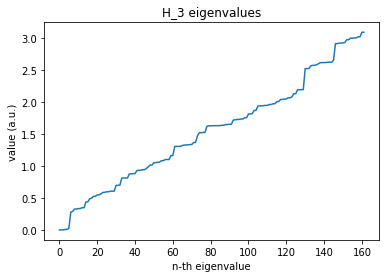

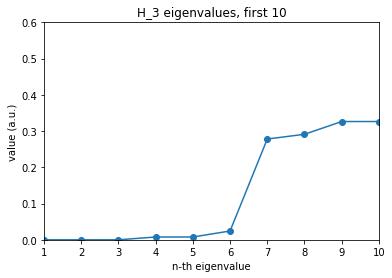

In [26]:
hess_h3 = h_3_g.get_hessian()
val3, vec3 = la.eigh(hess_h3)

plt.plot(val3)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_3 eigenvalues')
plt.show()
lowest3 = val3[:10]
x = np.arange(1, 11)
plt.plot(x, lowest3)
plt.scatter(x, lowest3)
plt.axis([1, 10, 0, 0.6])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_3 eigenvalues, first 10')
plt.xticks(x)
plt.show()

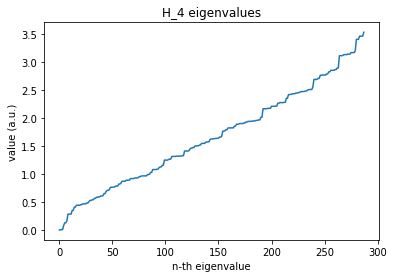

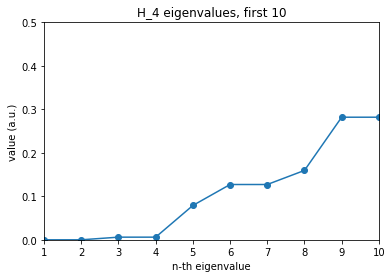

In [27]:
hess_h4 = h_4_g.get_hessian()
val4, vec4 = la.eigh(hess_h4)

plt.plot(val4)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_4 eigenvalues')
plt.show()
lowest4 = val4[:10]
x = np.arange(1, 11)
plt.plot(x, lowest4)
plt.scatter(x, lowest4)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_4 eigenvalues, first 10')
plt.xticks(x)
plt.show()

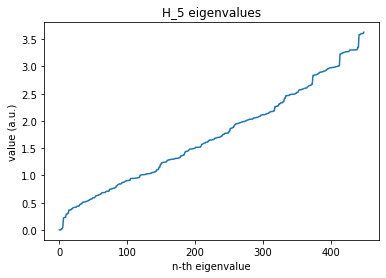

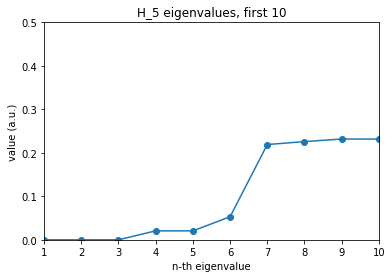

In [28]:
hess_h5 = h_5_g.get_hessian()
val5, vec5 = la.eigh(hess_h5)

plt.plot(val5)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_5 eigenvalues')
plt.show()
lowest5 = val5[:10]
x = np.arange(1, 11)
plt.plot(x, lowest5)
plt.scatter(x, lowest5)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_5 eigenvalues, first 10')
plt.xticks(x)
plt.show()

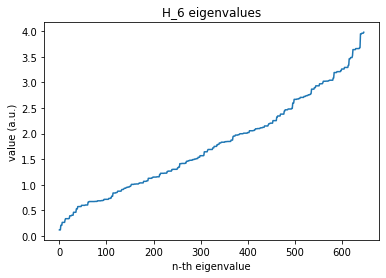

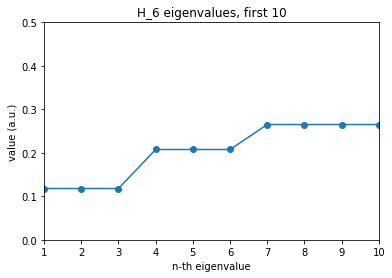

In [29]:
hess_h6 = h_6_g.get_hessian()
val6, vec6 = la.eigh(hess_h6)

plt.plot(val6)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_6 eigenvalues')
plt.show()
lowest6 = val6[:10]
x = np.arange(1, 11)
plt.plot(x, lowest6)
plt.scatter(x, lowest6)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_6 eigenvalues, first 10')
plt.xticks(x)
plt.show()

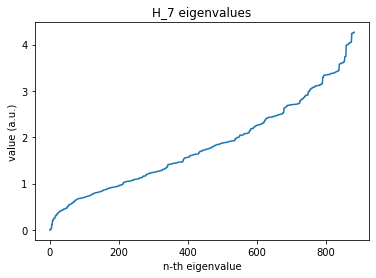

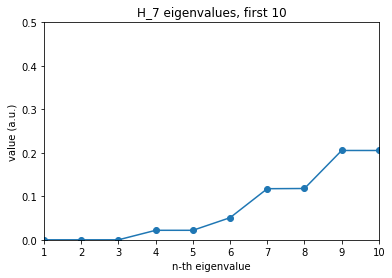

In [30]:
hess_h7 = h_7_g.get_hessian()
val7, vec7 = la.eigh(hess_h7)

plt.plot(val7)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_7 eigenvalues')
plt.show()
lowest7 = val7[:10]
x = np.arange(1, 11)
plt.plot(x, lowest7)
plt.scatter(x, lowest7)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_7 eigenvalues, first 10')
plt.xticks(x)
plt.show()

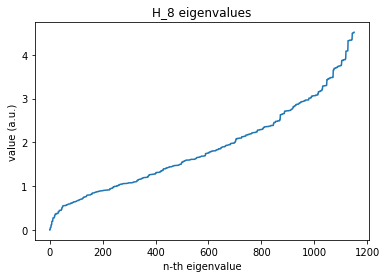

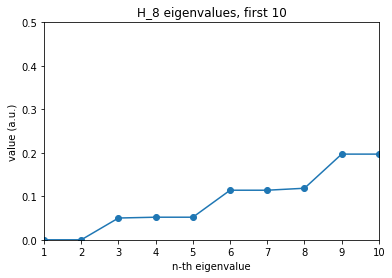

In [31]:
hess_h8 = h_8_g.get_hessian()
val8, vec8 = la.eigh(hess_h8)

plt.plot(val8)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_8 eigenvalues')
plt.show()
lowest8 = val8[:10]
x = np.arange(1, 11)
plt.plot(x, lowest8)
plt.scatter(x, lowest8)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_8 eigenvalues, first 10')
plt.xticks(x)
plt.show()

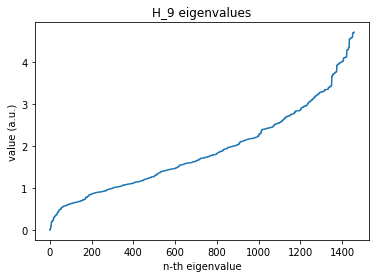

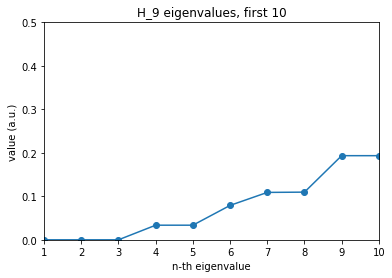

In [32]:
hess_h9 = h_9_g.get_hessian()
val9, vec9 = la.eigh(hess_h9)

plt.plot(val9)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_9 eigenvalues')
plt.show()
lowest9 = val9[:10]
x = np.arange(1, 11)
plt.plot(x, lowest9)
plt.scatter(x, lowest9)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_9 eigenvalues, first 10')
plt.xticks(x)
plt.show()

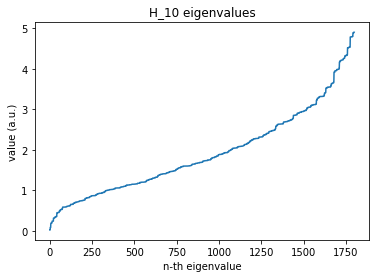

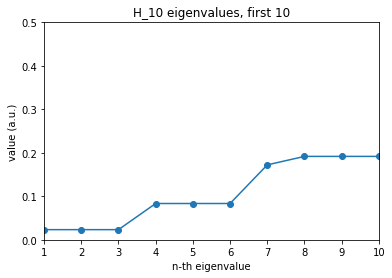

In [33]:
hess_h10 = h_10_g.get_hessian()
val10, vec10 = la.eigh(hess_h10)

plt.plot(val10)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_10 eigenvalues')
plt.show()
lowest10 = val10[:10]
x = np.arange(1, 11)
plt.plot(x, lowest10)
plt.scatter(x, lowest10)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_10 eigenvalues, first 10')
plt.xticks(x)
plt.show()

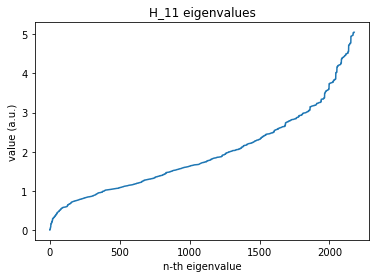

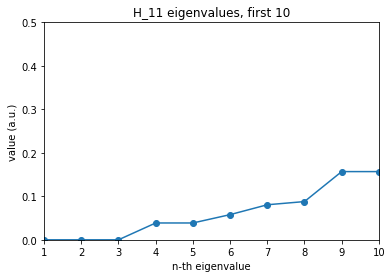

In [34]:
hess_h11 = h_11_g.get_hessian()
val11, vec11 = la.eigh(hess_h11)

plt.plot(val11)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_11 eigenvalues')
plt.show()
lowest11 = val11[:10]
x = np.arange(1, 11)
plt.plot(x, lowest11)
plt.scatter(x, lowest11)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_11 eigenvalues, first 10')
plt.xticks(x)
plt.show()

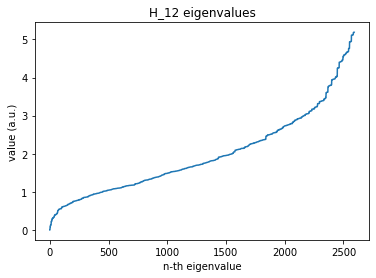

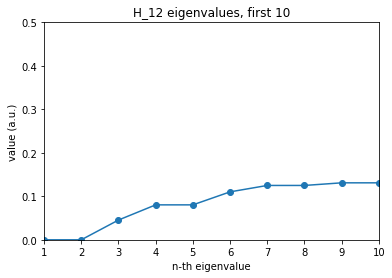

In [35]:
hess_h12 = h_12_g.get_hessian()
val12, vec12 = la.eigh(hess_h12)

plt.plot(val12)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_12 eigenvalues')
plt.show()
lowest12 = val12[:10]
x = np.arange(1, 11)
plt.plot(x, lowest12)
plt.scatter(x, lowest12)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_12 eigenvalues, first 10')
plt.xticks(x)
plt.show()

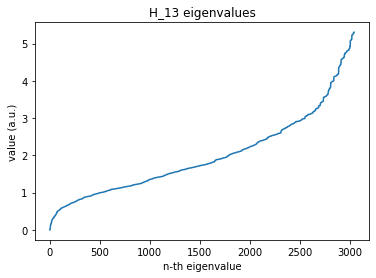

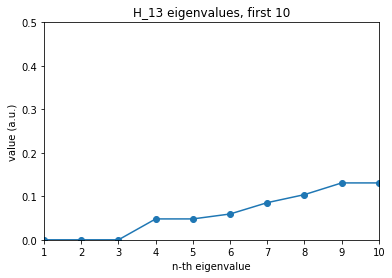

In [36]:
hess_h13 = h_13_g.get_hessian()
val13, vec13 = la.eigh(hess_h13)

plt.plot(val13)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_13 eigenvalues')
plt.show()
lowest13 = val13[:10]
x = np.arange(1, 11)
plt.plot(x, lowest13)
plt.scatter(x, lowest13)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_13 eigenvalues, first 10')
plt.xticks(x)
plt.show()

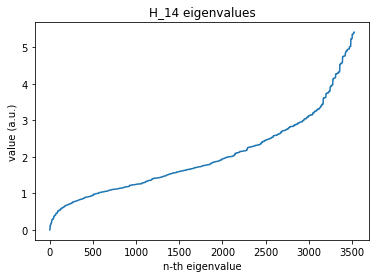

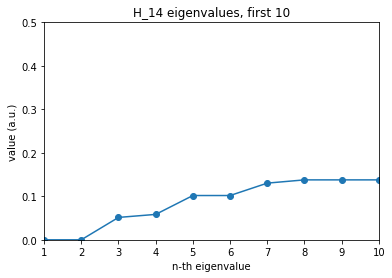

In [37]:
hess_h14 = h_14_g.get_hessian()
val14, vec14 = la.eigh(hess_h14)

plt.plot(val14)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_14 eigenvalues')
plt.show()
lowest14 = val14[:10]
x = np.arange(1, 11)
plt.plot(x, lowest14)
plt.scatter(x, lowest14)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_14 eigenvalues, first 10')
plt.xticks(x)
plt.show()

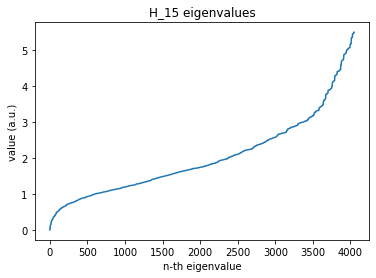

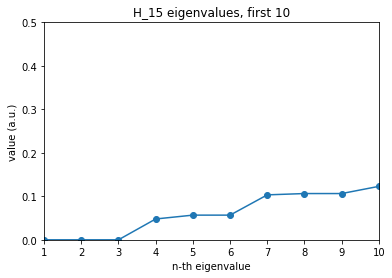

In [38]:
hess_h15 = h_15_g.get_hessian()
val15, vec15 = la.eigh(hess_h15)

plt.plot(val15)
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_15 eigenvalues')
plt.show()
lowest15 = val15[:10]
x = np.arange(1, 11)
plt.plot(x, lowest15)
plt.scatter(x, lowest15)
plt.axis([1, 10, 0, 0.5])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('H_15 eigenvalues, first 10')
plt.xticks(x)
plt.show()

# Complex Methods

It is often reported that complex GHF is needed in order to find the lowest GHF energy. This is not always the case. In this section We will discuss some examples and show that often, the complex results are the same as the real ones. This makes sense, because if a solution is internally stable in the real GHF space, it will also be stable in the complex GHF space. The only example, that i know of, that is known to have a lower lying complex GHF solution than real GHF solution, is the Beryllium atom in specific basis sets.

## Example 1: $H_4$ using complex RHF

$H_4$ is quite the complex molecule. Let's start with a normal RHF calculation and check the stability.

In [39]:
rhf_h4 = RHF.MF(h4, 4)
rhf_h4.get_scf_solution()
rhf_h4.stability_analysis('internal')
rhf_h4.stability_analysis('external')

Number of iterations: 103
Converged SCF energy in Hartree: -1.9403598392830816 (Real RHF)
The wave function is stable within the real RHF space.
There is an external real/complex instability in the real RHF wave function.
There is an external RHF/UHF instability in the real RHF wave function.


The result is a stable solution within the real RHF space, which means we can now check the external stability. As previously shown, the UHF calculation finds a lower energy state, the triplet state. It thus makes sense that an RHF->UHF instability is found. But we also find a real complex instability. Let's see what happens when we follow that.

In [40]:
rhf_h4.get_scf_solution(complex_method=True)
rhf_h4.stability_analysis('internal')
rhf_h4.stability_analysis('external')

Number of iterations: 96
Converged SCF energy in Hartree: -1.9567491787232192 (Complex RHF)
The wave function is stable within the complex RHF space.
There is an external RHF/UHF instability in the complex RHF wave function.


We find a lower lying energy state, that still has the RHF->UHF instability. However the real->complex instability is now resolved.

## Example 2: $H_3$ using complex GHF

Let's start with a normal calculation, followed by stability analysis.

In [41]:
c_ghf_h3 = GHF.MF(h3, 3)
c_ghf_h3.get_scf_solution()
c_ghf_h3.stability_analysis('internal')
c_ghf_h3.stability_analysis('external')

Number of iterations: 56
Converged SCF energy in Hartree: -1.5062743202608853 (Real GHF)
 <S^2> = 0.7735672499981336, <S_z> = 0.5000000000000002, Multiplicity = 2.0234300086715464
There is an internal instability in the real GHF wave function.
There is an external real/complex instability in the real GHF wave function.


We see an internal instability, and an external real->complex intstability. Previously, we followed the internal instability. What happens when we follow the external one?

In [42]:
c_ghf_h3.get_scf_solution(complex_method=True)
c_ghf_h3.stability_analysis('internal')

Number of iterations: 709
Converged SCF energy in Hartree: -1.5077312813102774 (Complex GHF)
 <S^2> = 0.7790732147530122, <S_z> = 5.324106001247664e-05, Multiplicity = 2.0288649188677024
The wave function is stable in the complex GHF space.


We find a state with the exact same energy and spin expectation values. Let's try and verify whether or not the solutions are the same.

In [43]:
print('MO energies of the complex solution')
print('-----------------------------------')
print(c_ghf_h3.get_mo_energy())
print('')
print('MO energies of the real solution')
print('--------------------------------')
print(h_3_g.get_mo_energy())

MO energies of the complex solution
-----------------------------------
[-0.72835842 -0.72834994 -0.23820129  0.11734821  0.11734842  0.15213046
  0.42797555  0.42797828  0.65209139  0.73032519  0.73032565  0.76510993
  1.0725577   1.07256027  1.49753212  1.49753237  1.51838402  1.5345525
  1.71812901  1.71813411  1.77283121  1.81632756  1.81632778  1.83667948
  2.36018226  2.36018655  2.77131251  2.79701447  2.79701483  2.81304015]

MO energies of the real solution
--------------------------------
[-0.7283584  -0.72834996 -0.23820129  0.11734821  0.11734842  0.15213046
  0.42797556  0.42797827  0.65209139  0.73032519  0.73032565  0.76510993
  1.0725577   1.07256026  1.49753212  1.49753237  1.51838402  1.5345525
  1.71812903  1.7181341   1.77283121  1.81632756  1.81632778  1.83667948
  2.36018228  2.36018653  2.77131251  2.79701447  2.79701483  2.81304015]


The MO's have the exact same energies. Next, look at the Hessian eigenvalues. 

In [44]:
print('Hessian eigenvalues of the complex solution')
print('-------------------------------------------')
h_3_c_val, h_3_c_vec = la.eigh(c_ghf_h3.get_hessian())
print(h_3_c_val)
print('')
print('Hessian eigenvalues of the real solution')
print('----------------------------------------')
print(val3)

Hessian eigenvalues of the complex solution
-------------------------------------------
[-2.37691780e-08 -3.68357444e-11  2.36787659e-08  7.71060340e-03
  7.71208850e-03  2.42905908e-02  2.78090741e-01  2.91109137e-01
  3.26367987e-01  3.26368330e-01  3.34415822e-01  3.34416791e-01
  3.47410345e-01  3.47428963e-01  4.37976542e-01  4.37982362e-01
  4.86995664e-01  4.96733804e-01  5.25023357e-01  5.25023632e-01
  5.48709455e-01  5.48714904e-01  5.64790810e-01  5.86114495e-01
  5.88882855e-01  5.96817196e-01  5.96817541e-01  6.05650019e-01
  6.07363660e-01  6.07368410e-01  6.97613169e-01  6.97613372e-01
  7.01740234e-01  8.12189919e-01  8.12586281e-01  8.12586362e-01
  8.13182493e-01  8.76239027e-01  8.76239071e-01  8.81692653e-01
  8.81693797e-01  9.28503951e-01  9.32848515e-01  9.32852149e-01
  9.42049142e-01  9.42052749e-01  9.63026201e-01  9.85210268e-01
  1.01612765e+00  1.01612991e+00  1.05278024e+00  1.05278543e+00
  1.05858586e+00  1.06116567e+00  1.08402251e+00  1.08402380e+00
  

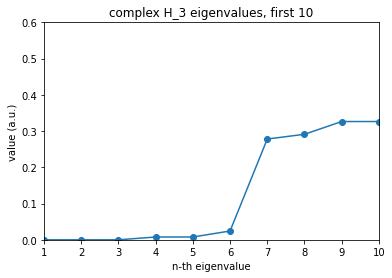

In [45]:
lowest3_c = h_3_c_val[:10]
x = np.arange(1, 11)
plt.plot(x, lowest3_c)
plt.scatter(x, lowest3_c)
plt.axis([1, 10, 0, 0.6])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('complex H_3 eigenvalues, first 10')
plt.xticks(x)
plt.show()

We find the exact same eigenvalues for both solutions. Both also have three 0 eigenvalues, indicating a GHF solution, which was expected. For clarity we have even plotted the graph of the lowest 10 eigenvalues, which is the same as it was in the real case.

But, how do we know we don't just converged to the real solution? If our solution is actually complex, it should have different, complex valued MO coefficients than the real solution. Let's verify this.

In [46]:
print('MO coefficients of the complex solution')
print('---------------------------------------')
print(c_ghf_h3.get_mo_coeff())
print('')
print('MO coefficients of the real solution')
print('------------------------------------')
print(h_3_g.get_mo_coeff())

MO coefficients of the complex solution
---------------------------------------
[[-3.55405026e-01+2.12892760e-04j  6.00343170e-02+1.83346680e-03j
   2.66491379e-01-4.85304488e-09j -1.63651712e-01+3.62589436e-05j
  -8.37122690e-02-7.37016148e-05j  7.84284824e-02+1.26005136e-08j
   5.68001756e-01-1.96465392e-05j  5.17224712e-02+2.23185641e-04j
   6.14339454e-01+1.46782493e-08j  6.14519197e-01-2.31098450e-04j
  -3.52836451e-01-4.27174674e-04j  3.41264347e-01+6.58471099e-08j
  -5.18076903e-16-4.49124524e-18j -8.59539207e-17+1.27464289e-17j
  -1.71294031e-01-1.48316132e-04j  2.00149111e-01-1.19134728e-04j
  -1.24099683e-01-3.18422434e-08j -2.07420303e-01-5.04017586e-09j
   4.23975274e-01-3.44711724e-05j -3.00601112e-02-4.41748360e-04j
   1.85116205e-15+3.08332545e-18j -1.44600252e-15-7.45297647e-18j
   3.65471642e-16+1.68643675e-18j -3.50415596e-16+1.38161708e-18j
   1.57400816e-02+2.51095864e-06j -1.22487797e-02+3.17158996e-06j
  -7.84392367e-01-3.96719229e-09j  7.55419406e-01-5.37280607e-

Indeed, our MO coefficients are different and have complex values for complex GHF. In conclusion, we can say that we can find a complex and a real solution for the exact same system, meaning the complex solution is just another way of writing the real solution, and is not fundamentally complex.

## Example 3: complex $H_{13}$ calculation

We have shown that a complex calculation for $H_3$ finds the same solution as the real calculation. Let's see if this is also the case for a bigger system, like $H_{13}$.

In [47]:
c_ghf_h13 = GHF.MF(h13, 13)
c_ghf_h13.get_scf_solution()
c_ghf_h13.stability_analysis('internal')
c_ghf_h13.stability_analysis('external')

Number of iterations: 83
Converged SCF energy in Hartree: -6.946518342199742 (Real GHF)
 <S^2> = 0.8834691530288739, <S_z> = 0.4999999999999969, Multiplicity = 2.129290166256233
There is an internal instability in the real GHF wave function.
There is an external real/complex instability in the real GHF wave function.


We see the same instabilities as we saw with $H_3$. Now let's see what happens when we follow the real->complex instability instead of the internal one.

In [48]:
c_ghf_h13.get_scf_solution(complex_method=True)
c_ghf_h13.stability_analysis('internal')

Number of iterations: 117
Converged SCF energy in Hartree: -6.959102869501557 (Complex GHF)
 <S^2> = 1.0706124261393326, <S_z> = 5.7525641983247056e-06, Multiplicity = 2.298358045335263
The wave function is stable in the complex GHF space.


We find a solution with the same energies and spin expectation values, as we did for $H_3$. Now let's verify, as we did for $H_3$, that it is indeed the same solution, and not a fundamentally complex solution.

In [49]:
print('Are the MO energies the same?')
print(np.allclose(h_13_g.get_mo_energy(), c_ghf_h13.get_mo_energy()))
print('')
print('Are the hessian eigenvalues the same?')
h_13_c_val, h_13_c_vec = la.eigh(c_ghf_h13.get_hessian())
print(np.allclose(val13, h_13_c_val))

Are the MO energies the same?
True

Are the hessian eigenvalues the same?
True


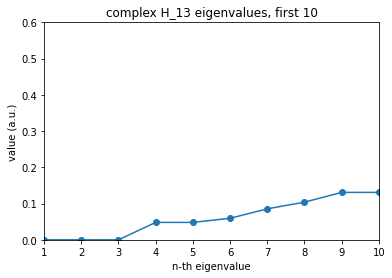

In [50]:
lowest13_c = h_13_c_val[:10]
x = np.arange(1, 11)
plt.plot(x, lowest13_c)
plt.scatter(x, lowest13_c)
plt.axis([1, 10, 0, 0.6])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('complex H_13 eigenvalues, first 10')
plt.xticks(x)
plt.show()

Next let's check the MO's and whether or not they have complex values.

In [51]:
imag_part = np.sum(c_ghf_h13.get_mo_coeff().imag)
if abs(imag_part) > 1e-3:
    print('The MOs are complex valued.')

The MOs are complex valued.


As with $H_3$, we find the exact same solution, with complex MO's. We can thus once again conclude that the soliution is not fundamentally complex.

## Example 4: Beryllium atom

The Be atom in the 4-31g basis set is often reported in literature as a system with a known GHF solution, as well as still showing a real->complex instability. Let's see if we can find the real and complex GHF solutions of this system.

In [52]:
Be = gto.M(atom='Be 1 0 0', basis='4-31g')

In [53]:
ghf_be = GHF.MF(Be, 4)
ghf_be.get_scf_solution()
improved_mos = ghf_be.stability_analysis('internal')
ghf_be.get_scf_solution(improved_mos)
ghf_be.stability_analysis('internal')
ghf_be.stability_analysis('external')

Number of iterations: 10
Converged SCF energy in Hartree: -14.55687105484466 (Real GHF)
 <S^2> = 3.3306690738754696e-16, <S_z> = -1.1102230246251565e-16, Multiplicity = 1.0000000000000007
There is an internal instability in the real GHF wave function.
Number of iterations: 1206
Converged SCF energy in Hartree: -14.557798355722761 (Real GHF)
 <S^2> = 0.20766136552188708, <S_z> = -4.440892098500626e-16, Multiplicity = 1.3530134744663662
The wave function is stable within the real GHF space.
There is an external real/complex instability in the real GHF wave function.


What we see here, is what's reported in literature. A GHF solution is found (<$S_z$> = 0), but there is still an external real->complex instability. Let's follow this, and try to run the calculation using complex GHF.

In [54]:
ghf_be.get_scf_solution(complex_method=True)
improved_mos_c = ghf_be.stability_analysis('internal')
ghf_be.get_scf_solution(improved_mos, complex_method=True)
ghf_be.stability_analysis('internal')

Number of iterations: 212
Converged SCF energy in Hartree: -14.557742512430341 (Complex GHF)
 <S^2> = 0.1930624150311291, <S_z> = -4.440892098500626e-16, Multiplicity = 1.3312586751358717
There is an internal instability in the complex GHF wave function.
Number of iterations: 2797
Converged SCF energy in Hartree: -14.557818595924125 (Complex GHF)
 <S^2> = 0.21301370352031346, <S_z> = 0.0, Multiplicity = 1.3609022059212241
The wave function is stable in the complex GHF space.


[-4.84347620e-07 -4.80842595e-07  9.59711943e-07  1.49313787e-03
  1.49460560e-03  1.49461625e-03  1.49901137e-03  1.49901138e-03
  3.23642376e-02  1.26521341e-01]


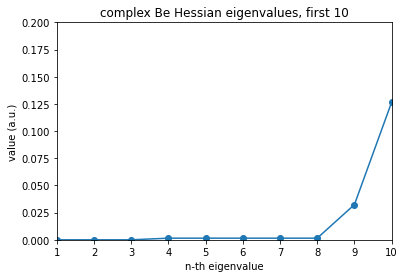

In [55]:
be_val, be_vec = la.eigh(ghf_be.get_hessian())
lowest_be = be_val[:10]
print(lowest_be)
x = np.arange(1, 11)
plt.plot(x, lowest_be)
plt.scatter(x, lowest_be)
plt.axis([1, 10, 0, 0.2])
plt.xlabel('n-th eigenvalue')
plt.ylabel('value (a.u.)')
plt.title('complex Be Hessian eigenvalues, first 10')
plt.xticks(x)
plt.show()

What we see is that the complex method finds a GHF solution (3 Hessian eigenvalue of zero) Thats slightly lower in energy than the real GHF solution, and has slightly more spin contamination as well. We can thus say that the Be atom, in contrast to the hydrogen rings, has a true, fundamentally complex GHF solution.

## conclusion

For the hydrogen rings, complex GHF is not necessary. The most stable solution can already be found using real generalised Hartree-Fock calculations. When looking for the lowest Hartree-Fock solution, you should always look for an internally stable solution first. This way, you will always avoid breaking symmetries when it's not necessary to do so. The Be atom however, has a true complex GHF solution.

# Finding the lowest HF solution

Stability analysis is a powerful tool. By following the internal and external stability analysis, one can 'cascade' towards the lowest HF solution, breaking more and more symmetry along the way. The 'lowest_HF' algorithm does this for us. First internal stabilities are checked. When an internally stable solution is found, external stabilities are checked. If a lower lying solution can be found through symmetry breaking, this path is followed. If this isn't the case, but a lower lying energy can be found by going complex, then the algorithm will look for a complex solution. If there is no external instability, and the solution is internally stable, the most stable solution has been found. For open shell systems, the first method that will be checked is UHF, for closed shell systems RHF will be checked first. Let's take a look at a couple of examples.

## Example 1: $H_6$

$H_6$ has no zero eigenvalues in the GHF Hessian, pointing towards it actually being a RHF solution. 

In [56]:
lowest.Find(h6, 6).run_algorithm()

Checking real RHF internal stability
Number of iterations: 10
Converged SCF energy in Hartree: -3.2496082173277276 (Real RHF)
The wave function is stable within the real RHF space.
Checking real RHF external stability
The wave function is stable within the real/complex & RHF/UHF space.
Real RHF converges to lowest HF energy


## Example 2: $H_4$

$H_4$ shows two zero eigenvalues in the GHF Hessian, meaning it's an UHF solution.

In [57]:
lowest.Find(h4, 4).run_algorithm()

Checking real RHF internal stability
Number of iterations: 103
Converged SCF energy in Hartree: -1.9403598392830816 (Real RHF)
The wave function is stable within the real RHF space.
Checking real RHF external stability
There is an external real/complex instability in the real RHF wave function.
There is an external RHF/UHF instability in the real RHF wave function.
Checking real UHF internal stability
Number of iterations: 95
Converged SCF energy in Hartree: -1.9403598392825958 (Real UHF)
<S^2> = -6.217248937900877e-15, <S_z> = 0.0, Multiplicity = 0.9999999999999876
There is an internal instability in the real UHF wave function.
Number of iterations: 38
Converged SCF energy in Hartree: -2.0210882477047014 (Real UHF)
<S^2> = 1.0565277000970748, <S_z> = 0.0, Multiplicity = 2.2860688529412885
The wave function is stable within the real UHF space.
Checking real UHF external stability
The wave function is stable within the real/complex & UHF/GHF space.
Real UHF converges to lowest HF energy

## Example 3: $H_3$

The $H_3$ GHF Hessian has 3 zero eigenvalues, pointing towards a GHF solution.

In [58]:
lowest.Find(h3, 3).run_algorithm()

Checking real UHF internal stability
Number of iterations: 133
Converged SCF energy in Hartree: -1.5062743202605442 (Real UHF)
<S^2> = 0.7735672502962203, <S_z> = 0.5, Multiplicity = 2.0234300089661814
The wave function is stable within the real UHF space.
Checking real UHF external stability
There is an external UHF/GHF instability in the real UHF wave function.
Checking real GHF internal stability
Number of iterations: 56
Converged SCF energy in Hartree: -1.5062743202608853 (Real GHF)
 <S^2> = 0.7735672499981336, <S_z> = 0.5000000000000002, Multiplicity = 2.0234300086715464
There is an internal instability in the real GHF wave function.
Number of iterations: 995
Converged SCF energy in Hartree: -1.5077312813097308 (Real GHF)
 <S^2> = 0.7790732147497723, <S_z> = 5.382224540673164e-05, Multiplicity = 2.0288649188645085
The wave function is stable within the real GHF space.
Checking real GHF external stability
The wave function is stable within the real/complex space.
Real GHF converges

## Example 4: Be-atom

The Beryllium atom in the 4-31G basis set is often referred to in literature as a GHF example. The real GHF energy value is known, but it is also reported that the molecule still has an external real/complex instability. Let's check this. 

In [59]:
lowest.Find(Be, 4).run_algorithm()

Checking real RHF internal stability
Number of iterations: 10
Converged SCF energy in Hartree: -14.556871054844663 (Real RHF)
The wave function is stable within the real RHF space.
Checking real RHF external stability
There is an external RHF/UHF instability in the real RHF wave function.
Checking real UHF internal stability
Number of iterations: 10
Converged SCF energy in Hartree: -14.55687105484466 (Real UHF)
<S^2> = -1.7763568394002505e-15, <S_z> = 0.0, Multiplicity = 0.9999999999999964
There is an internal instability in the real UHF wave function.
Number of iterations: 144
Converged SCF energy in Hartree: -14.557742512430162 (Real UHF)
<S^2> = 0.1930621810250548, <S_z> = 0.0, Multiplicity = 1.3312583235796946
The wave function is stable within the real UHF space.
Checking real UHF external stability
There is an external UHF/GHF instability in the real UHF wave function.
Checking real GHF internal stability
Number of iterations: 10
Converged SCF energy in Hartree: -14.5568710548446

Indeed, we are able to find a complex GHF solution with an even lower energy than the real GHF solution.

# When does spin frustration disappear?

In order to check when spin frustration disappears, we're going to run an UHF calculation on $H_3$, where the atom at the top of the triangle slowly moves further and further away. The initial value for x is chosen to create an equilateral triangle, where each side is 1 angstrom.

Number of iterations: 133
Converged SCF energy in Hartree: -1.5062743202605442 (Real UHF)
<S^2> = 0.7735672502962203, <S_z> = 0.5, Multiplicity = 2.0234300089661814
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in the real UHF wave function.
There is an external UHF/GHF instability in

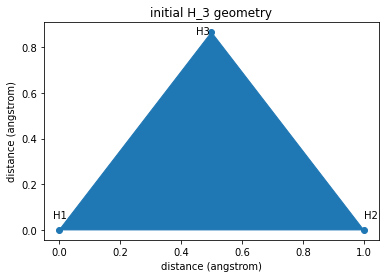

the length of the sides is:
---------------------------
|H1, H2| = 1 Angstrom
|H1, H3| = 1.0 Angstrom
|H2, H3| = 1.0 Angstrom


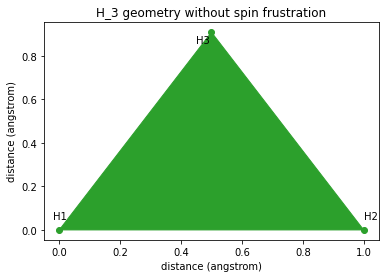

the length of the sides is:
---------------------------
|H1, H2| = 1 Angstrom
|H1, H3| = 1.19979 Angstrom
|H2, H3| = 1.19979 Angstrom

The top atom was moved 0.043 Angstrom away from the botom side, before spin frustration disappeared.
There no longer is an external UHF->GHF instability at this geometry.


In [60]:
i = 0
x = 0.86602540378
h3_test = gto.M(atom = 'h 0 0 0; h 0 {} 0.5; h 0 0 1'.format(x), spin = 1, basis = 'cc-pvdz')

test = UHF.MF(h3_test, 3)
calc = test.get_scf_solution()
test.stability_analysis('external')
while test.ext_instability_ug:
    x += 0.001
    i += 1
    h3_test = gto.M(atom = 'h 0 0 0; h 0 {} 0.5; h 0 0 1'.format(x), spin = 1, basis = 'cc-pvdz')
    test = UHF.MF(h3_test, 3)
    calc = test.scf()
    test.stability_analysis('external')

atom1_x = 0
atom1_y = 0
atom2_x = 1
atom2_y = 0
atom3_x = 0.5
atom3_y = 0.86602540378
H3_init = [[atom1_x, atom1_y], [atom2_x, atom2_y], [atom3_x, atom3_y]]
color = 'tab:blue'
plt.scatter(atom1_x, atom1_y, color=color)
plt.annotate('H1', (atom1_x, atom1_y), xytext=(-0.02, 0.05))
plt.scatter(atom2_x, atom2_y, color=color)
plt.annotate('H2', (atom2_x, atom2_y), xytext=(1, 0.05))
plt.scatter(atom3_x, atom3_y, color=color)
plt.annotate('H3', (atom3_x, atom3_y), xytext=(0.45, x-0.05))
init = plt.Polygon(H3_init, color=color)
plt.gca().add_patch(init)
plt.title('initial H_3 geometry')
plt.xlabel('distance (angstrom)')
plt.ylabel('distance (angstrom)')
plt.show()
angle = m.acos(atom3_y)
side = np.around(0.5 / m.sin(angle), 5)
print('the length of the sides is:')
print('---------------------------')
print('|H1, H2| = ' + str(atom2_x - atom1_x) + ' Angstrom')
print('|H1, H3| = ' + str(side) + ' Angstrom')
print('|H2, H3| = ' + str(side) + ' Angstrom')
atom1_x = 0
atom1_y = 0
atom2_x = 1
atom2_y = 0
atom3_x = 0.5
atom3_y = x
H3_init = [[atom1_x, atom1_y], [atom2_x, atom2_y], [atom3_x, atom3_y]]
color = 'tab:green'
plt.scatter(atom1_x, atom1_y, color=color)
plt.annotate('H1', (atom1_x, atom1_y), xytext=(-0.02, 0.05))
plt.scatter(atom2_x, atom2_y, color=color)
plt.annotate('H2', (atom2_x, atom2_y), xytext=(1, 0.05))
plt.scatter(atom3_x, atom3_y, color=color)
plt.annotate('H3', (atom3_x, atom3_y), xytext=(0.45, x-0.05))
init = plt.Polygon(H3_init, color=color)
plt.gca().add_patch(init)
plt.title('H_3 geometry without spin frustration')
plt.xlabel('distance (angstrom)')
plt.ylabel('distance (angstrom)')
plt.show()
angle = m.acos(x)
side = np.around(0.5 / m.sin(angle), 5)
print('the length of the sides is:')
print('---------------------------')
print('|H1, H2| = ' + str(atom2_x - atom1_x) + ' Angstrom')
print('|H1, H3| = ' + str(side) + ' Angstrom')
print('|H2, H3| = ' + str(side) + ' Angstrom')
print('')
print('The top atom was moved ' + str(np.around((i * 0.001), 3)) + ' Angstrom away from the botom side, before spin frustration disappeared.')
print('There no longer is an external UHF->GHF instability at this geometry.')

We can thus state that the geometry & symmetry is incredibly important when dealing with spin frustrated systems. The D3h point group is spin frustrated, but when digressing even a small amount from this geometry, the spin frustration disappears. 

# General summary of the Hartree-Fock methods

First, let's calculate the RHF energies.

In [61]:
rhf_h4 = RHF.MF(h4, 4)
e_rhf_h4 = np.around(rhf_h4.scf()[0] * 627.5, 2)

rhf_h6 = RHF.MF(h6, 6)
e_rhf_h6 = np.around(rhf_h6.scf()[0] * 627.5, 2)

rhf_h8 = RHF.MF(h8, 8)
e_rhf_h8 = np.around(rhf_h8.scf()[0] * 627.5, 2)

rhf_h10 = RHF.MF(h10, 10)
e_rhf_h10 = np.around(rhf_h10.scf()[0] * 627.5, 2)

rhf_h12 = RHF.MF(h12, 12)
e_rhf_h12 = np.around(rhf_h12.scf()[0] * 627.5, 2)

rhf_h14 = RHF.MF(h14, 14)
e_rhf_h14 = np.around(rhf_h14.scf()[0] * 627.5, 2)

In [62]:
c_rhf_h4 = RHF.MF(h4, 4)
e_rhf_h4_c = np.around(rhf_h4.scf(complex_method=True)[0].real * 627.5, 2)

c_rhf_h6 = RHF.MF(h6, 6)
e_rhf_h6_c = np.around(rhf_h6.scf(complex_method=True)[0].real * 627.5, 2)

c_rhf_h8 = RHF.MF(h8, 8)
e_rhf_h8_c = np.around(rhf_h8.scf(complex_method=True)[0].real * 627.5, 2)

c_rhf_h10 = RHF.MF(h10, 10)
e_rhf_h10_c = np.around(rhf_h10.scf(complex_method=True)[0].real * 627.5, 2)

c_rhf_h12 = RHF.MF(h12, 12)
e_rhf_h12_c = np.around(rhf_h12.scf(complex_method=True)[0].real * 627.5, 2)

c_rhf_h14 = RHF.MF(h14, 14)
e_rhf_h14_c = np.around(rhf_h14.scf(complex_method=True)[0].real * 627.5, 2)

Next, calculate the UHF energies.

In [63]:
e_uhf_3 = np.around(((uhf_h3[0]) * 627.5), 2)
e_uhf_4 = np.around(((uhf_h4[0]) * 627.5), 2)
e_uhf_5 = np.around(((uhf_h5[0]) * 627.5), 2)
e_uhf_6 = np.around(((uhf_h6[0]) * 627.5), 2)
e_uhf_7 = np.around(((uhf_h7[0]) * 627.5), 2)
e_uhf_8 = np.around(((uhf_h8[0]) * 627.5), 2)
e_uhf_9 = np.around(((uhf_h9[0]) * 627.5), 2)
e_uhf_10 = np.around(((uhf_h10[0]) * 627.5), 2)
e_uhf_11 = np.around(((uhf_h11[0]) * 627.5), 2)
e_uhf_12 = np.around(((uhf_h12[0]) * 627.5), 2)
e_uhf_13 = np.around(((uhf_h13[0]) * 627.5), 2)
e_uhf_14 = np.around(((uhf_h14[0]) * 627.5), 2)
e_uhf_15 = np.around(((uhf_h15[0]) * 627.5), 2)

In [64]:
c_uhf_h3 = UHF.MF(h3, 3)
e_uhf_h3_c = np.around(c_uhf_h3.scf(complex_method=True)[0].real * 627.5, 2)

c_uhf_h4 = UHF.MF(h4, 4)
c_uhf_h4.scf(complex_method=True)
c_mo_4 = c_uhf_h4.stability_analysis('internal')
e_uhf_h4_c = np.around(c_uhf_h4.scf(c_mo_4, complex_method=True)[0].real * 627.5, 2)

c_uhf_h5 = UHF.MF(h5, 5)
e_uhf_h5_c = np.around(c_uhf_h5.scf(complex_method=True)[0].real * 627.5, 2)

c_uhf_h6 = UHF.MF(h6, 6)
e_uhf_h6_c = np.around(c_uhf_h6.scf(complex_method=True)[0].real * 627.5, 2)

c_uhf_h7 = UHF.MF(h7, 7)
e_uhf_h7_c = np.around(c_uhf_h7.diis(complex_method=True)[0].real * 627.5, 2)

c_uhf_h8 = UHF.MF(h8, 8)
c_uhf_h8.scf(complex_method=True)
c_mo_8 = c_uhf_h8.stability_analysis('internal')
e_uhf_h8_c = np.around(c_uhf_h8.scf(c_mo_8, complex_method=True)[0].real * 627.5, 2)

c_uhf_h9 = UHF.MF(h9, 9)
e_uhf_h9_c = np.around(c_uhf_h9.scf(complex_method=True)[0].real * 627.5, 2)

c_uhf_h10 = UHF.MF(h10, 10)
e_uhf_h10_c = np.around(c_uhf_h10.scf(complex_method=True)[0].real * 627.5, 2)

c_uhf_h11 = UHF.MF(h11, 11)
e_uhf_h11_c = np.around(c_uhf_h11.scf(complex_method=True)[0].real * 627.5, 2)

c_uhf_h12 = UHF.MF(h12, 12)
c_uhf_h12.scf(complex_method=True)
c_mo_12 = c_uhf_h12.stability_analysis('internal')
e_uhf_h12_c = np.around(c_uhf_h12.scf(c_mo_12, complex_method=True)[0].real * 627.5, 2)

c_uhf_h13 = UHF.MF(h13, 13)
e_uhf_h13_c = np.around(c_uhf_h13.scf(complex_method=True)[0].real * 627.5, 2)

c_uhf_h14 = UHF.MF(h14, 14)
c_uhf_h14.scf(complex_method=True)
c_mo_14 = c_uhf_h14.stability_analysis('internal')
e_uhf_h14_c = np.around(c_uhf_h14.scf(c_mo_14, complex_method=True)[0].real * 627.5, 2)

c_uhf_h15 = UHF.MF(h15, 15)
e_uhf_h15_c = np.around(c_uhf_h15.scf(complex_method=True)[0].real * 627.5, 2)

There is an internal instability in the complex UHF wave function.
There is an internal instability in the complex UHF wave function.
There is an internal instability in the complex UHF wave function.
There is an internal instability in the complex UHF wave function.


Finally, the GHF energies.

In [65]:
e_ghf_3 = np.around(((ghf_h3[0]) * 627.5), 2)
e_ghf_4 = np.around(((ghf_h4[0]) * 627.5), 2)
e_ghf_5 = np.around(((ghf_h5[0]) * 627.5), 2)
e_ghf_6 = np.around(((ghf_h6[0]) * 627.5), 2)
e_ghf_7 = np.around(((ghf_h7[0]) * 627.5), 2)
e_ghf_8 = np.around(((ghf_h8[0]) * 627.5), 2)
e_ghf_9 = np.around(((ghf_h9[0]) * 627.5), 2)
e_ghf_10 = np.around(((ghf_h10[0]) * 627.5), 2)
e_ghf_11 = np.around(((ghf_h11[0]) * 627.5), 2)
e_ghf_12 = np.around(((ghf_h12[0]) * 627.5), 2)
e_ghf_13 = np.around(((ghf_h13[0]) * 627.5), 2)
e_ghf_14 = np.around(((ghf_h14[0]) * 627.5), 2)
e_ghf_15 = np.around(((ghf_h15[0]) * 627.5), 2)

In [66]:
c_ghf_h3 = GHF.MF(h3, 3)
e_ghf_h3_c = np.around(c_ghf_h3.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h4 = GHF.MF(h4, 4)
e_ghf_h4_c = np.around(c_ghf_h4.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h5 = GHF.MF(h5, 5)
e_ghf_h5_c = np.around(c_ghf_h5.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h6 = GHF.MF(h6, 6)
e_ghf_h6_c = np.around(c_ghf_h6.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h7 = GHF.MF(h7, 7)
e_ghf_h7_c = np.around(c_ghf_h7.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h8 = GHF.MF(h8, 8)
e_ghf_h8_c = np.around(c_ghf_h8.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h9 = GHF.MF(h9, 9)
e_ghf_h9_c = np.around(c_ghf_h9.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h10 = GHF.MF(h10, 10)
e_ghf_h10_c = np.around(c_ghf_h10.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h11 = GHF.MF(h11, 11)
e_ghf_h11_c = np.around(c_ghf_h11.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h12 = GHF.MF(h12, 12)
e_ghf_h12_c = np.around(c_ghf_h12.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h13 = GHF.MF(h13, 13)
e_ghf_h13_c = np.around(c_ghf_h13.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h14 = GHF.MF(h14, 14)
e_ghf_h14_c = np.around(c_ghf_h14.scf(complex_method=True)[0].real * 627.5, 2)

c_ghf_h15 = GHF.MF(h15, 15)
e_ghf_h15_c = np.around(c_ghf_h15.scf(complex_method=True)[0].real * 627.5, 2)

## Let's put all the results in a table.

| Molecule | rRHF ($\frac{kcal}{mol}$) | cRHF ($\frac{kcal}{mol}$) | rUHF ($\frac{kcal}{mol}$) | cUHF ($\frac{kcal}{mol}$) | rGHF ($\frac{kcal}{mol}$) | cGHF ($\frac{kcal}{mol}$) |
| --- | --- | --- | --- |--- | --- | --- |
| $H_3$ | - | - | {{e_uhf_3}} | {{e_uhf_h3_c}} | {{e_ghf_3}} | {{e_ghf_h3_c}} |
| $H_4$ | {{e_rhf_h4}} | {{e_rhf_h4_c}} | {{e_uhf_4}} | {{e_uhf_h4_c}} | {{e_ghf_4}} | {{e_ghf_h4_c}} |
| $H_5$ | - | - | {{e_uhf_5}} | {{e_uhf_h5_c}} | {{e_ghf_5}} | {{e_ghf_h5_c}} |
| $H_6$ | {{e_rhf_h6}} | {{e_rhf_h6_c}} | {{e_uhf_6}} | {{e_uhf_h6_c}} | {{e_ghf_6}} | {{e_ghf_h6_c}} |
| $H_7$ | - | - | {{e_uhf_7}} | {{e_uhf_h7_c}} | {{e_ghf_7}} | {{e_ghf_h7_c}} |
| $H_8$ | {{e_rhf_h8}} | {{e_rhf_h8_c}} | {{e_uhf_8}} | {{e_uhf_h8_c}} | {{e_ghf_8}} | {{e_ghf_h8_c}} |
| $H_9$ | - | - | {{e_uhf_9}} | {{e_uhf_h9_c}} | {{e_ghf_9}} | {{e_ghf_h9_c}} |
| $H_{10}$ | {{e_rhf_h10}} | {{e_rhf_h10_c}} | {{e_uhf_10}} | {{e_uhf_h10_c}} | {{e_ghf_10}} | {{e_ghf_h10_c}} |
| $H_{11}$ | - | - | {{e_uhf_11}} | {{e_uhf_h11_c}} | {{e_ghf_11}} | {{e_ghf_h11_c}} |
| $H_{12}$ | {{e_rhf_h12}} | {{e_rhf_h12_c}} | {{e_uhf_12}} | {{e_uhf_h12_c}} | {{e_ghf_12}} | {{e_ghf_h12_c}} |
| $H_{13}$ | - | - | {{e_uhf_13}} | {{e_uhf_h13_c}} | {{e_ghf_13}} | {{e_ghf_h13_c}} |
| $H_{14}$ | {{e_rhf_h14}} | {{e_rhf_h14_c}} | {{e_uhf_14}} | {{e_uhf_h14_c}} | {{e_ghf_14}} | {{e_ghf_h14_c}} |
| $H_{15}$ | - | - | {{e_uhf_15}} | {{e_uhf_h15_c}} | {{e_ghf_15}} | {{e_ghf_h15_c}} |